In [ ]:
#Source - https://www.kaggle.com/yuvrajmetrani/silkboard-bangalore-ambient-air-covid19lockdown

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
data1 = pd.read_csv("./datasets/co_blr_aq_lockdown_effect_CSB.csv")
data2 = pd.read_csv("./datasets/o3_blr_aq_lockdown_effect_CSB.csv")
data3 = pd.read_csv("./datasets/no2_blr_aq_lockdown_effect_CSB.csv")
data4 = pd.read_csv("./datasets/pm10_blr_aq_lockdown_effect_CSB.csv")
data5 = pd.read_csv("./datasets/pm25_blr_aq_lockdown_effect_CSB.csv")
data6 = pd.read_csv("./datasets/so2_blr_aq_lockdown_effect_CSB.csv")

In [3]:
data1.head()

,Unnamed: 0,location,city,country,utc,local,parameter,value,unit,latitude,longitude,attribution
0,0,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T22:15:00Z,2020-06-20T03:45:00+05:30,co,170,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,1,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T21:00:00Z,2020-06-20T02:30:00+05:30,co,150,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,2,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T19:30:00Z,2020-06-20T01:00:00+05:30,co,100,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T17:30:00Z,2020-06-19T23:00:00+05:30,co,540,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T16:45:00Z,2020-06-19T22:15:00+05:30,co,530,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


In [4]:
data1.nunique()

Unnamed: 0     3030
location          1
city              1
country           1
utc            3030
local          3030
parameter         1
value           197
unit              1
latitude          1
longitude         1
attribution       1
dtype: int64

In [5]:
data1.drop(['Unnamed: 0', 'location','city','country','parameter', 'unit', 'latitude', 'longitude', 'attribution','local'], axis=1, inplace=True)

In [6]:
data1.head()

,utc,value
0,2020-06-19T22:15:00Z,170
1,2020-06-19T21:00:00Z,150
2,2020-06-19T19:30:00Z,100
3,2020-06-19T17:30:00Z,540
4,2020-06-19T16:45:00Z,530


In [7]:
data1['utc'] = pd.to_datetime(data1['utc'])

In [8]:
data1.head()

,utc,value
0,2020-06-19 22:15:00+00:00,170
1,2020-06-19 21:00:00+00:00,150
2,2020-06-19 19:30:00+00:00,100
3,2020-06-19 17:30:00+00:00,540
4,2020-06-19 16:45:00+00:00,530


In [9]:
data1['date'] = data1['utc'].dt.strftime('%Y-%m-%d')

In [10]:
data1.head()

,utc,value,date
0,2020-06-19 22:15:00+00:00,170,2020-06-19
1,2020-06-19 21:00:00+00:00,150,2020-06-19
2,2020-06-19 19:30:00+00:00,100,2020-06-19
3,2020-06-19 17:30:00+00:00,540,2020-06-19
4,2020-06-19 16:45:00+00:00,530,2020-06-19


In [11]:
data1.tail()

,utc,value,date
3025,2020-02-20 02:15:00+00:00,1080,2020-02-20
3026,2020-02-20 02:00:00+00:00,1080,2020-02-20
3027,2020-02-20 01:45:00+00:00,1050,2020-02-20
3028,2020-02-20 00:30:00+00:00,1020,2020-02-20
3029,2020-02-20 00:00:00+00:00,980,2020-02-20


In [12]:
df1 = data1.groupby(['date']).agg(mean_value = ('value', np.mean))
df1 = df1.reset_index()
df1.sort_values('date', ascending = True)

,date,mean_value
0,2020-02-20,1046.279070
1,2020-02-21,924.500000
2,2020-02-22,981.111111
3,2020-02-23,977.222222
4,2020-02-24,1089.032258
...,...,...
114,2020-06-14,420.000000
115,2020-06-15,583.333333
116,2020-06-17,590.000000
117,2020-06-18,676.250000


In [13]:
data1.isnull().sum()

utc      0
value    0
date     0
dtype: int64

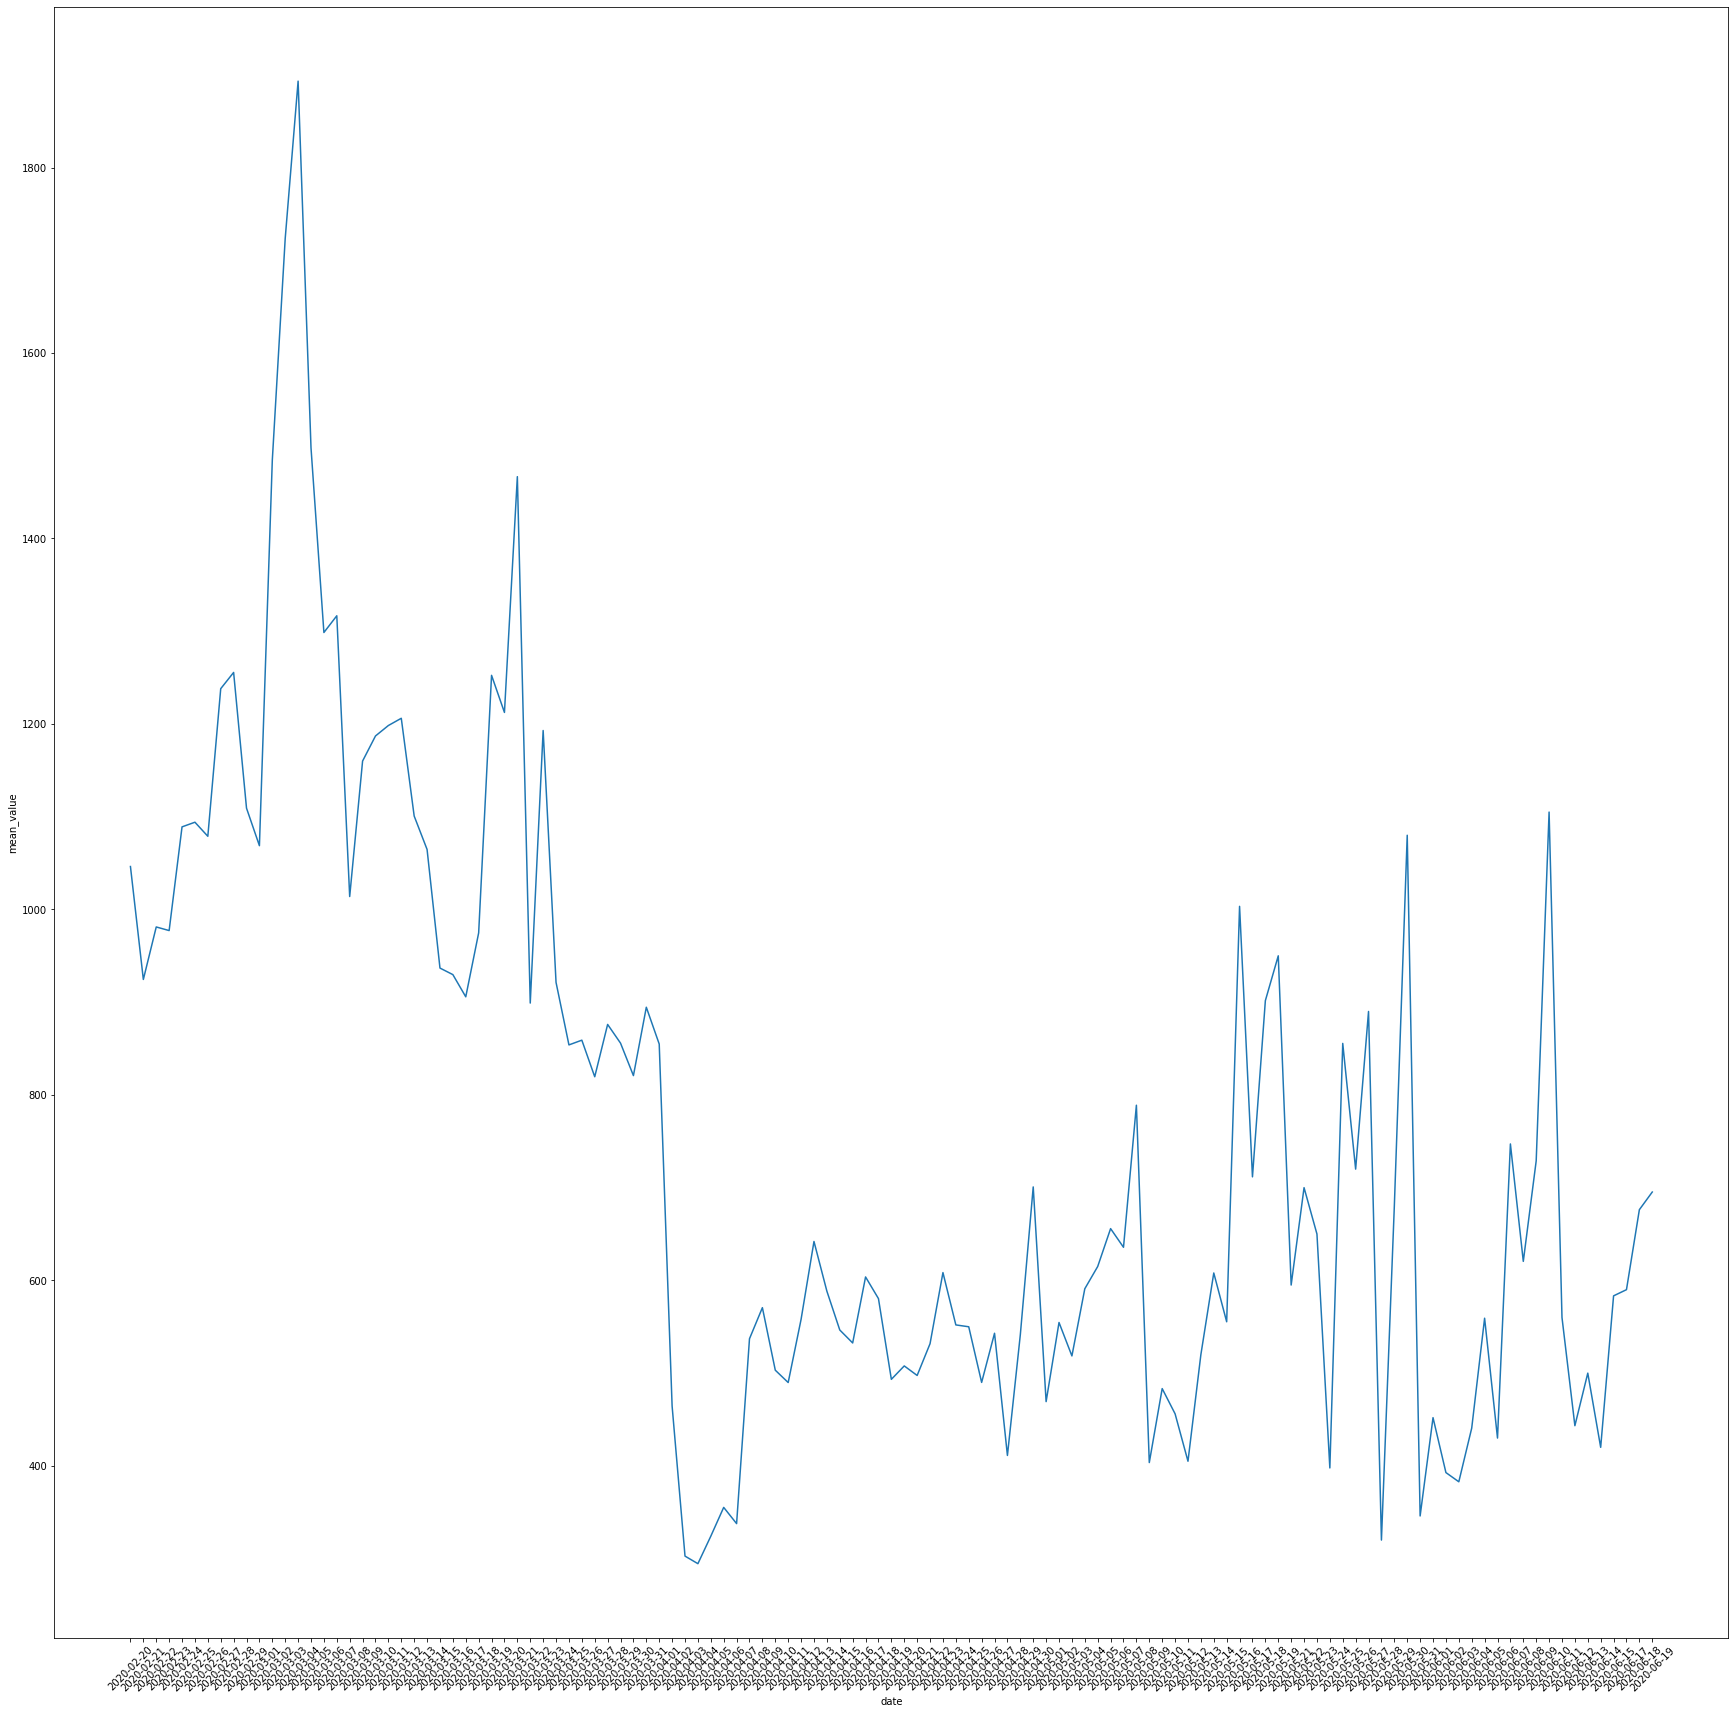

In [14]:
plt.figure(figsize=(30,30))
sns.lineplot(x=df1.date, y= df1.mean_value, data=df1)
plt.xticks(rotation=45)
plt.show()

In [21]:
data1.dtypes

utc      datetime64[ns, UTC]
value                  int64
date                  object
dtype: object

In [24]:
df2 = data1.groupby(data1.utc.dt.to_period("M")).agg('mean')
df2 = df2.reset_index()
df2.head()

,utc,value
0,2020-02,1081.322751
1,2020-03,1154.927686
2,2020-04,514.690265
3,2020-05,569.565217
4,2020-06,557.939394


In [29]:
df2['utc'] = df2['utc'].astype(str)
df2.dtypes

utc       object
value    float64
dtype: object

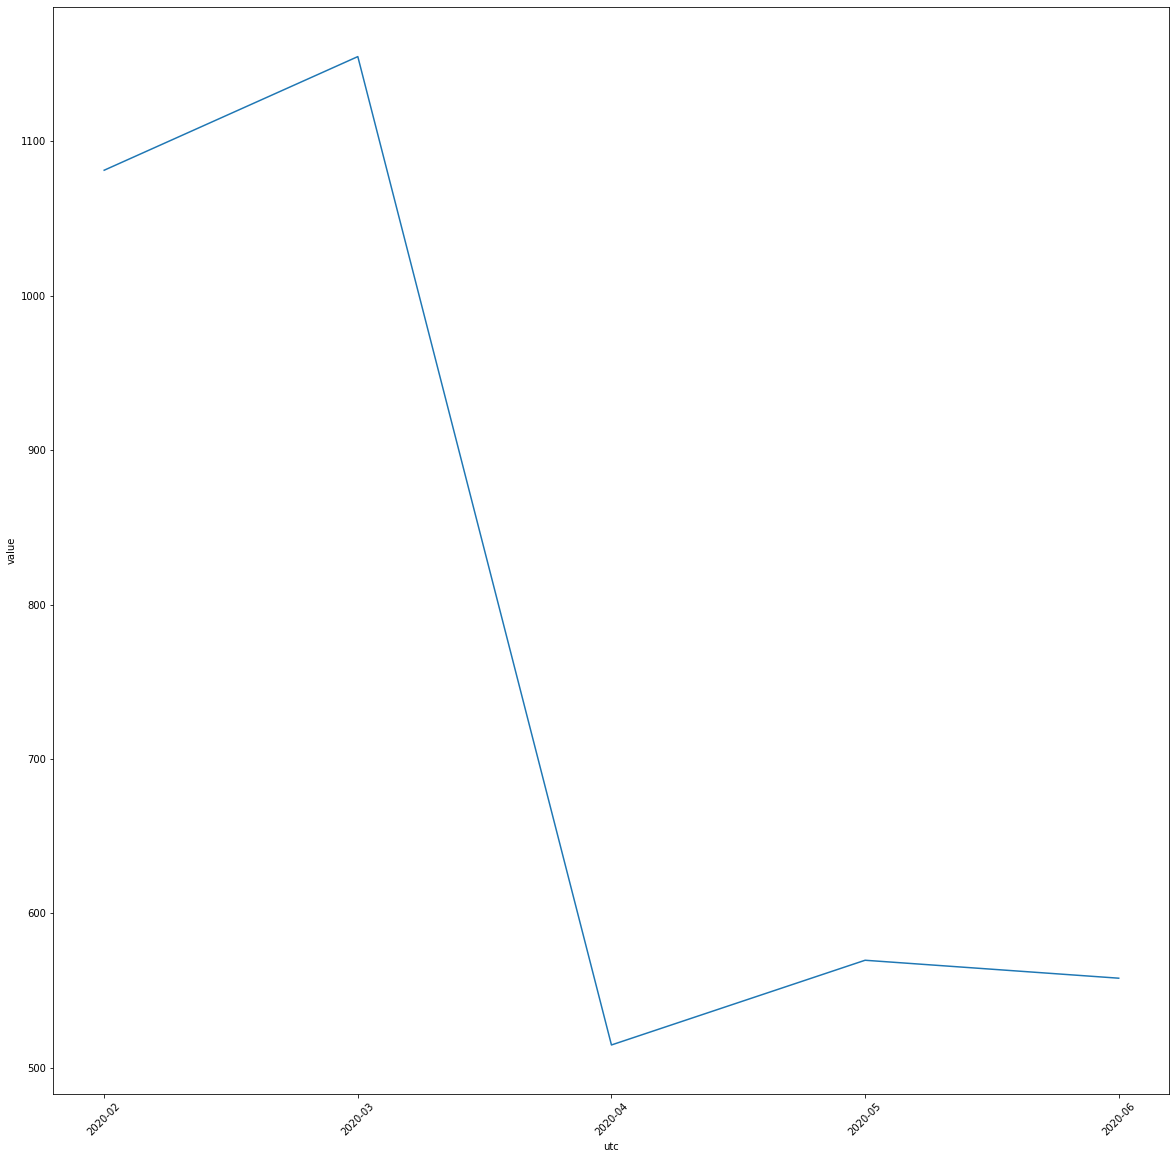

In [31]:
plt.figure(figsize=(20,20))
sns.lineplot(x=df2.utc, y= df2.value, data=df2)
plt.xticks(rotation=45)
plt.show()

In [37]:
df3 = data1.groupby(data1.utc.dt.to_period("W")).agg('mean')
df3 = df3.reset_index()
df3.head()


,utc,value
0,2020-02-17/2020-02-23,983.677419
1,2020-02-24/2020-03-01,1136.958175
2,2020-03-02/2020-03-08,1475.060729
3,2020-03-09/2020-03-15,1126.160338
4,2020-03-16/2020-03-22,1096.623932


In [38]:
df3['utc'].unique()

<PeriodArray>
['2020-02-17/2020-02-23', '2020-02-24/2020-03-01', '2020-03-02/2020-03-08',
 '2020-03-09/2020-03-15', '2020-03-16/2020-03-22', '2020-03-23/2020-03-29',
 '2020-03-30/2020-04-05', '2020-04-06/2020-04-12', '2020-04-13/2020-04-19',
 '2020-04-20/2020-04-26', '2020-04-27/2020-05-03', '2020-05-04/2020-05-10',
 '2020-05-11/2020-05-17', '2020-05-18/2020-05-24', '2020-05-25/2020-05-31',
 '2020-06-01/2020-06-07', '2020-06-08/2020-06-14', '2020-06-15/2020-06-21']
Length: 18, dtype: period[W-SUN]

In [32]:
data2.head()

,Unnamed: 0,location,city,country,utc,weekday,local,parameter,value,unit,latitude,longitude,attribution
0,0,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T22:15:00Z,7,2020-06-20T03:45:00+05:30,o3,14.78,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,1,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T21:00:00Z,7,2020-06-20T02:30:00+05:30,o3,13.76,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,2,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T19:30:00Z,7,2020-06-20T01:00:00+05:30,o3,15.39,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T17:30:00Z,6,2020-06-19T23:00:00+05:30,o3,15.88,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T16:45:00Z,6,2020-06-19T22:15:00+05:30,o3,13.13,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


In [33]:
data2.nunique()

Unnamed: 0     3681
location          1
city              1
country           1
utc            3681
weekday           7
local          3681
parameter         1
value          1601
unit              1
latitude          1
longitude         1
attribution       1
dtype: int64

In [34]:
data2.drop(['Unnamed: 0', 'location','city','country','parameter', 'unit', 'latitude', 'longitude', 'attribution','local'], axis=1, inplace=True)

In [35]:
data2.head()

,utc,weekday,value
0,2020-06-19T22:15:00Z,7,14.78
1,2020-06-19T21:00:00Z,7,13.76
2,2020-06-19T19:30:00Z,7,15.39
3,2020-06-19T17:30:00Z,6,15.88
4,2020-06-19T16:45:00Z,6,13.13


In [36]:
data2.weekday.unique()

array([7, 6, 5, 4, 3, 2, 1], dtype=int64)

In [39]:
data2.tail()

,utc,weekday,value
3676,2020-02-20T01:45:00Z,5,27.54
3677,2020-02-20T01:15:00Z,5,26.03
3678,2020-02-20T01:00:00Z,5,29.87
3679,2020-02-20T00:30:00Z,5,25.42
3680,2020-02-20T00:00:00Z,5,26.22


In [41]:
data2['utc'] = pd.to_datetime(data2['utc'])

In [42]:
data2['date'] = data2['utc'].dt.strftime('%Y-%m-%d')

In [43]:
df4 = data2.groupby(data2.utc.dt.to_period("M")).agg('mean')
df4 = df4.reset_index()
df4.head()

,utc,weekday,value
0,2020-02,4.551422,35.930263
1,2020-03,3.961181,34.733367
2,2020-04,4.045057,34.443551
3,2020-05,3.511765,31.250088
4,2020-06,3.716981,19.578821


In [44]:
df4['utc'] = df4['utc'].astype(str)
df4.dtypes

utc         object
weekday    float64
value      float64
dtype: object

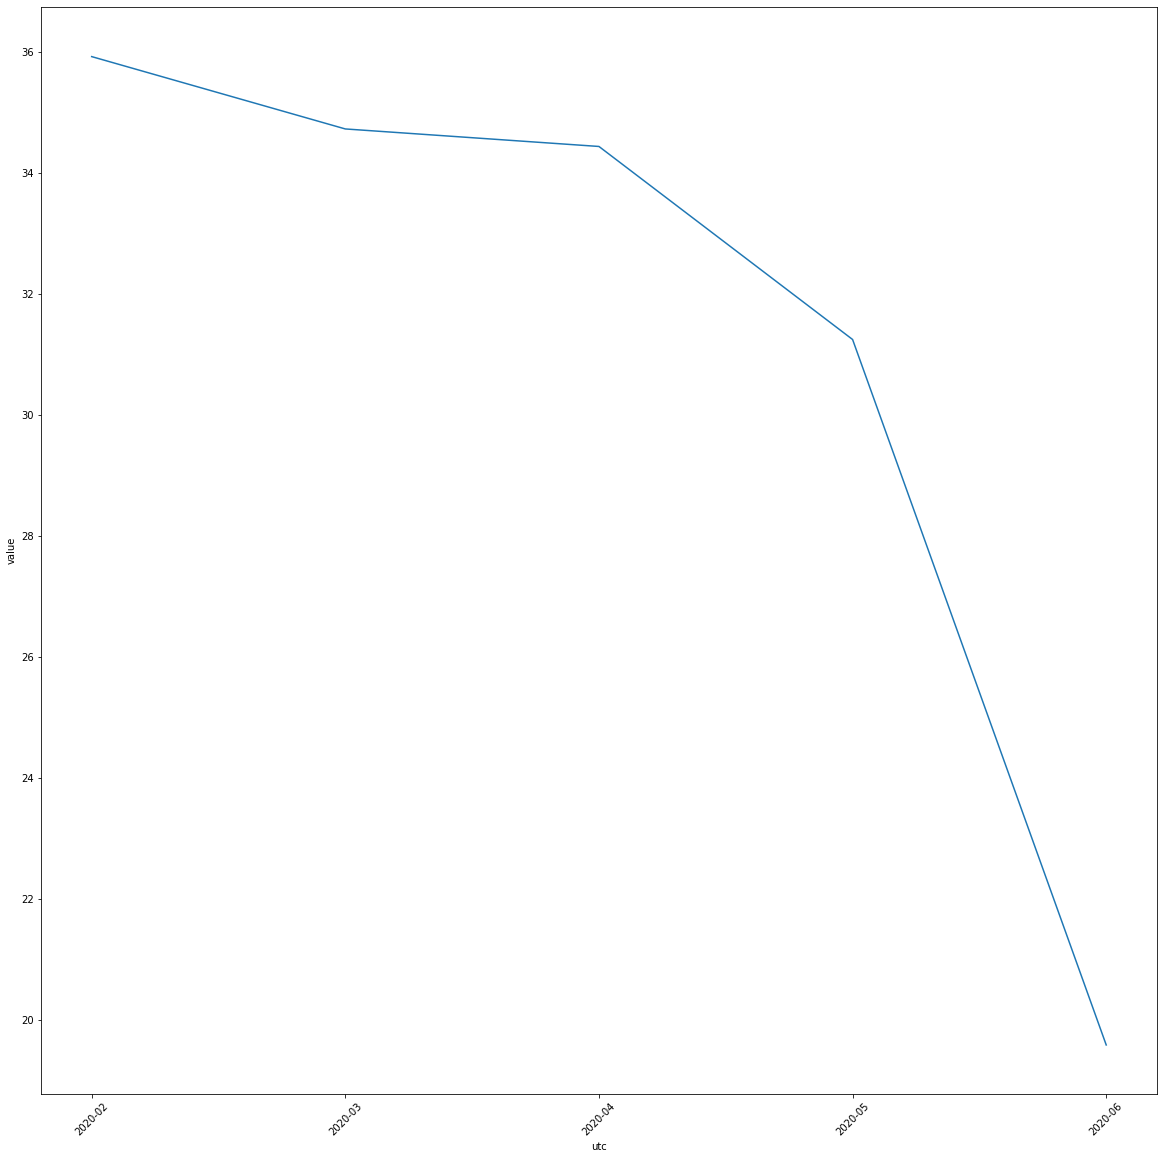

In [45]:
plt.figure(figsize=(20,20))
sns.lineplot(x=df4.utc, y= df4.value, data=df4)
plt.xticks(rotation=45)
plt.show()

In [46]:
data3.head()

,Unnamed: 0,location,city,country,utc,weekday,local,parameter,value,unit,latitude,longitude,attribution
0,0,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T22:15:00Z,7,2020-06-20T03:45:00+05:30,no2,12.6,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
1,1,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T21:00:00Z,7,2020-06-20T02:30:00+05:30,no2,13.0,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
2,2,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T19:30:00Z,7,2020-06-20T01:00:00+05:30,no2,13.5,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
3,3,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T17:30:00Z,6,2020-06-19T23:00:00+05:30,no2,16.2,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."
4,4,"Silk Board, Bengaluru - KSPCB",Bengaluru,IN,2020-06-19T16:45:00Z,6,2020-06-19T22:15:00+05:30,no2,15.1,µg/m³,12.917348,77.622813,"[{""url"":""https://app.cpcbccr.com/ccr/#/caaqm-d..."


In [47]:
data3.drop(['Unnamed: 0', 'location','city','country','parameter', 'unit', 'latitude', 'longitude', 'attribution','local'], axis=1, inplace=True)

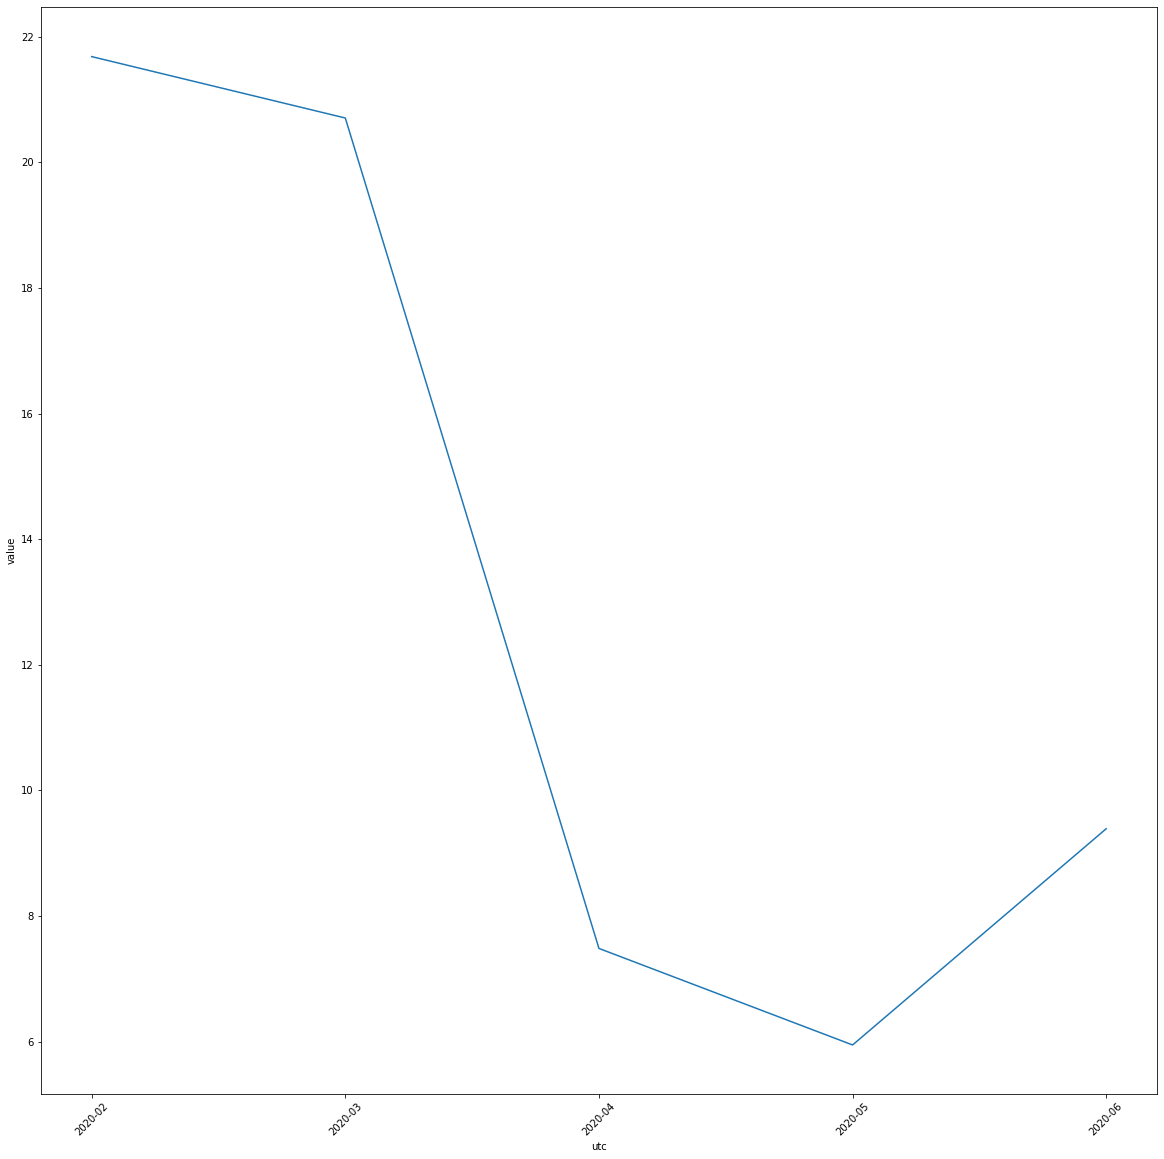

In [48]:
data3['utc'] = pd.to_datetime(data3['utc'])

data3['date'] = data3['utc'].dt.strftime('%Y-%m-%d')

df5 = data3.groupby(data3.utc.dt.to_period("M")).agg('mean')
df5 = df5.reset_index()
df5.head()

df5['utc'] = df5['utc'].astype(str)
df5.dtypes

plt.figure(figsize=(20,20))
sns.lineplot(x=df5.utc, y= df5.value, data=df5)
plt.xticks(rotation=45)
plt.show()

In [50]:
column_names = ["CO", "O3", "NO2"]
df6 = pd.DataFrame(columns = column_names)

In [64]:
df2.value.values

array([1081.32275132, 1154.92768595,  514.69026549,  569.56521739,
        557.93939394])

In [70]:
df2.columns

Index(['utc', 'value'], dtype='object')

In [71]:
df7 = pd.merge(df2,df4, on='utc')

In [72]:
df7.head()

,utc,value_x,weekday,value_y
0,2020-02,1081.322751,4.551422,35.930263
1,2020-03,1154.927686,3.961181,34.733367
2,2020-04,514.690265,4.045057,34.443551
3,2020-05,569.565217,3.511765,31.250088
4,2020-06,557.939394,3.716981,19.578821


In [101]:
df8 = pd.merge(df7,df5, on='utc')

In [102]:
df8.head()

,utc,value_x,weekday_x,value_y,weekday_y,value
0,2020-02,1081.322751,4.551422,35.930263,4.561404,21.682675
1,2020-03,1154.927686,3.961181,34.733367,3.940171,20.704872
2,2020-04,514.690265,4.045057,34.443551,4.037212,7.484100
3,2020-05,569.565217,3.511765,31.250088,3.510836,5.947368
4,2020-06,557.939394,3.716981,19.578821,3.705882,9.390196


In [103]:
df8.drop(['weekday_x','weekday_y'], axis=1, inplace=True)
df8.columns = ['utc', 'co','o3','no2']

In [104]:
df8.head()

,utc,co,o3,no2
0,2020-02,1081.322751,35.930263,21.682675
1,2020-03,1154.927686,34.733367,20.704872
2,2020-04,514.690265,34.443551,7.484100
3,2020-05,569.565217,31.250088,5.947368
4,2020-06,557.939394,19.578821,9.390196


<Figure size 720x720 with 0 Axes>

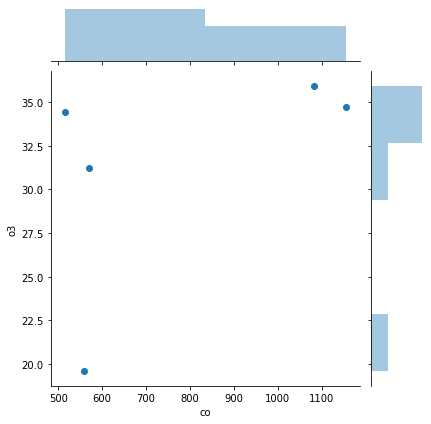

In [105]:
plt.figure(figsize=(10,10))
sns.jointplot(x=df8.co, y= df8.o3, data=df8)
plt.xticks(rotation=45)
plt.show()

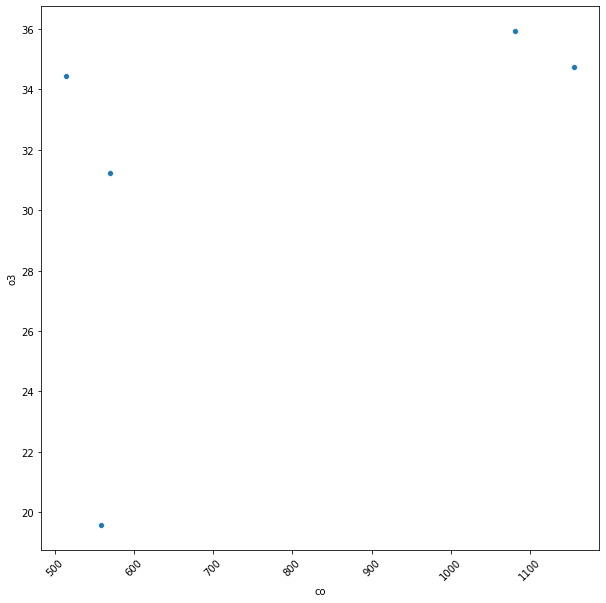

In [106]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=df8.co, y= df8.o3, data=df8)
plt.xticks(rotation=45)
plt.show()

In [107]:
df8 = df8.set_index('utc')
df8.head()

,co,o3,no2
utc,,,
2020-02,1081.322751,35.930263,21.682675
2020-03,1154.927686,34.733367,20.704872
2020-04,514.690265,34.443551,7.484100
2020-05,569.565217,31.250088,5.947368
2020-06,557.939394,19.578821,9.390196


In [108]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [112]:
df9 = pd.DataFrame(sc.fit_transform(df8), columns=df8.columns)
df9.head()
df9.index = df8.index
df9.head()

,co,o3,no2
utc,,,
2020-02,1.087043,0.789556,1.279764
2020-03,1.348833,0.590313,1.134945
2020-04,-0.928291,0.542069,-0.823138
2020-05,-0.733118,0.010466,-1.050738
2020-06,-0.774467,-1.932404,-0.540833


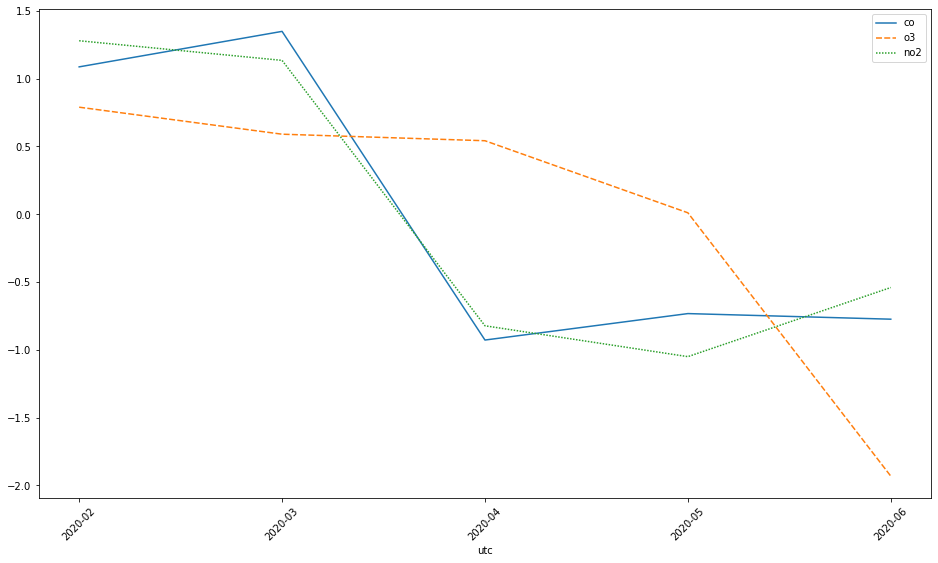

In [114]:
plt.figure(figsize=(16,9))
sns.lineplot(data=df9)
plt.xticks(rotation=45)
plt.show()